(10 points) Use the **Matlab function randn()** to **generate a data sample of N points** drawn from a **Gaussian distribution with mean µ_true = 10 and standard deviation σ_true = 4**. Consider the problem of **USING the DATA to get an ESTIMATE µ_hat of this GAUSSIAN MEAN, assuming it is UNKNOWN**, when the **STANDARD DEVIATION σ_true is KNOWN**.

Consider using one of the two prior distributions on the mean:
1.  a Gaussian prior with mean µ_prior = 10.5 and standard deviation σ_prior = 1
2.  a uniform prior over [9.5, 11.5]

Consider various sample sizes N = 5, 10, 20, 40, 60, 80, 100, 500, 10^3, 10^4. For each sample size N, repeat the following experiment M ≥ 100 times: generate the data, get the maximum likelihood estimate µ_ML, get the maximum-a-posterior estimates µ_MAP1 and µ_MAP2, and measure the relative errors |µ_hat − µ_true|/µ_true for all three estimates.

• (8 points) Plot a single graph that shows the relative errors for each value of N as a box plot(use the Matlab boxplot() function), for each of the three estimates.
• (2 points) Interpret what you see in the graph. (i) What happens to the error as N increases ? (ii) Which of the three estimates will you prefer and why ?

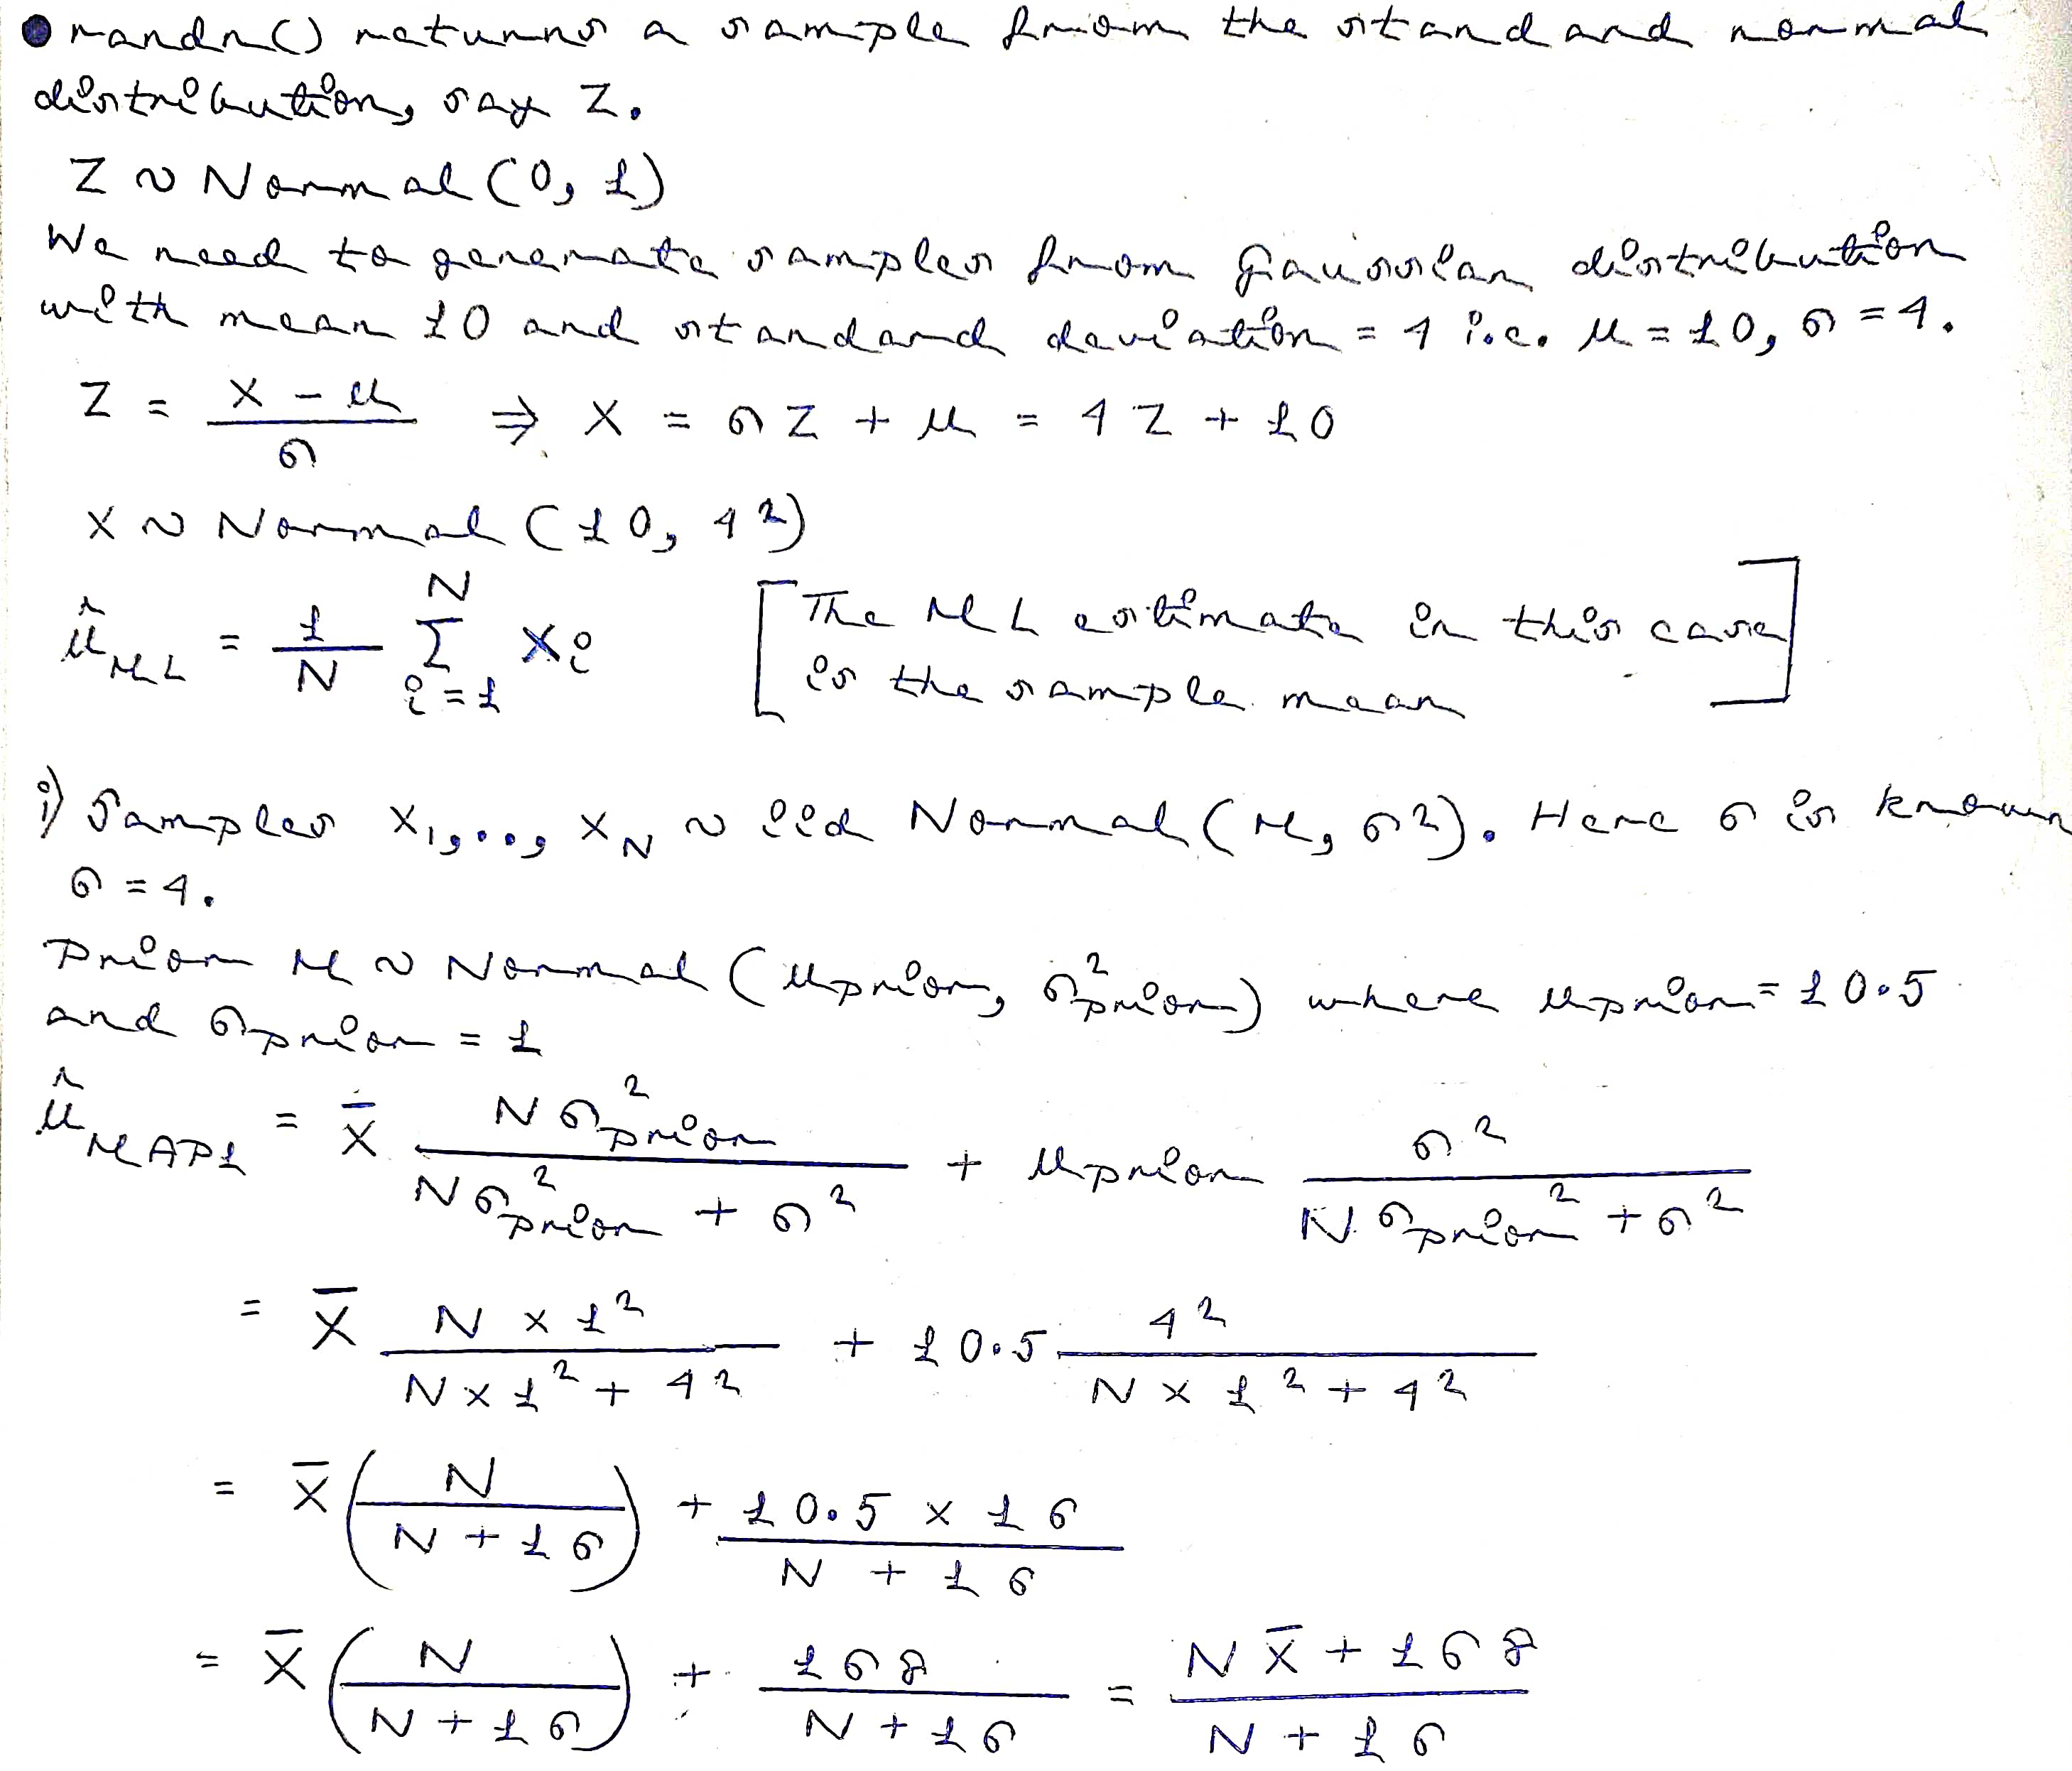

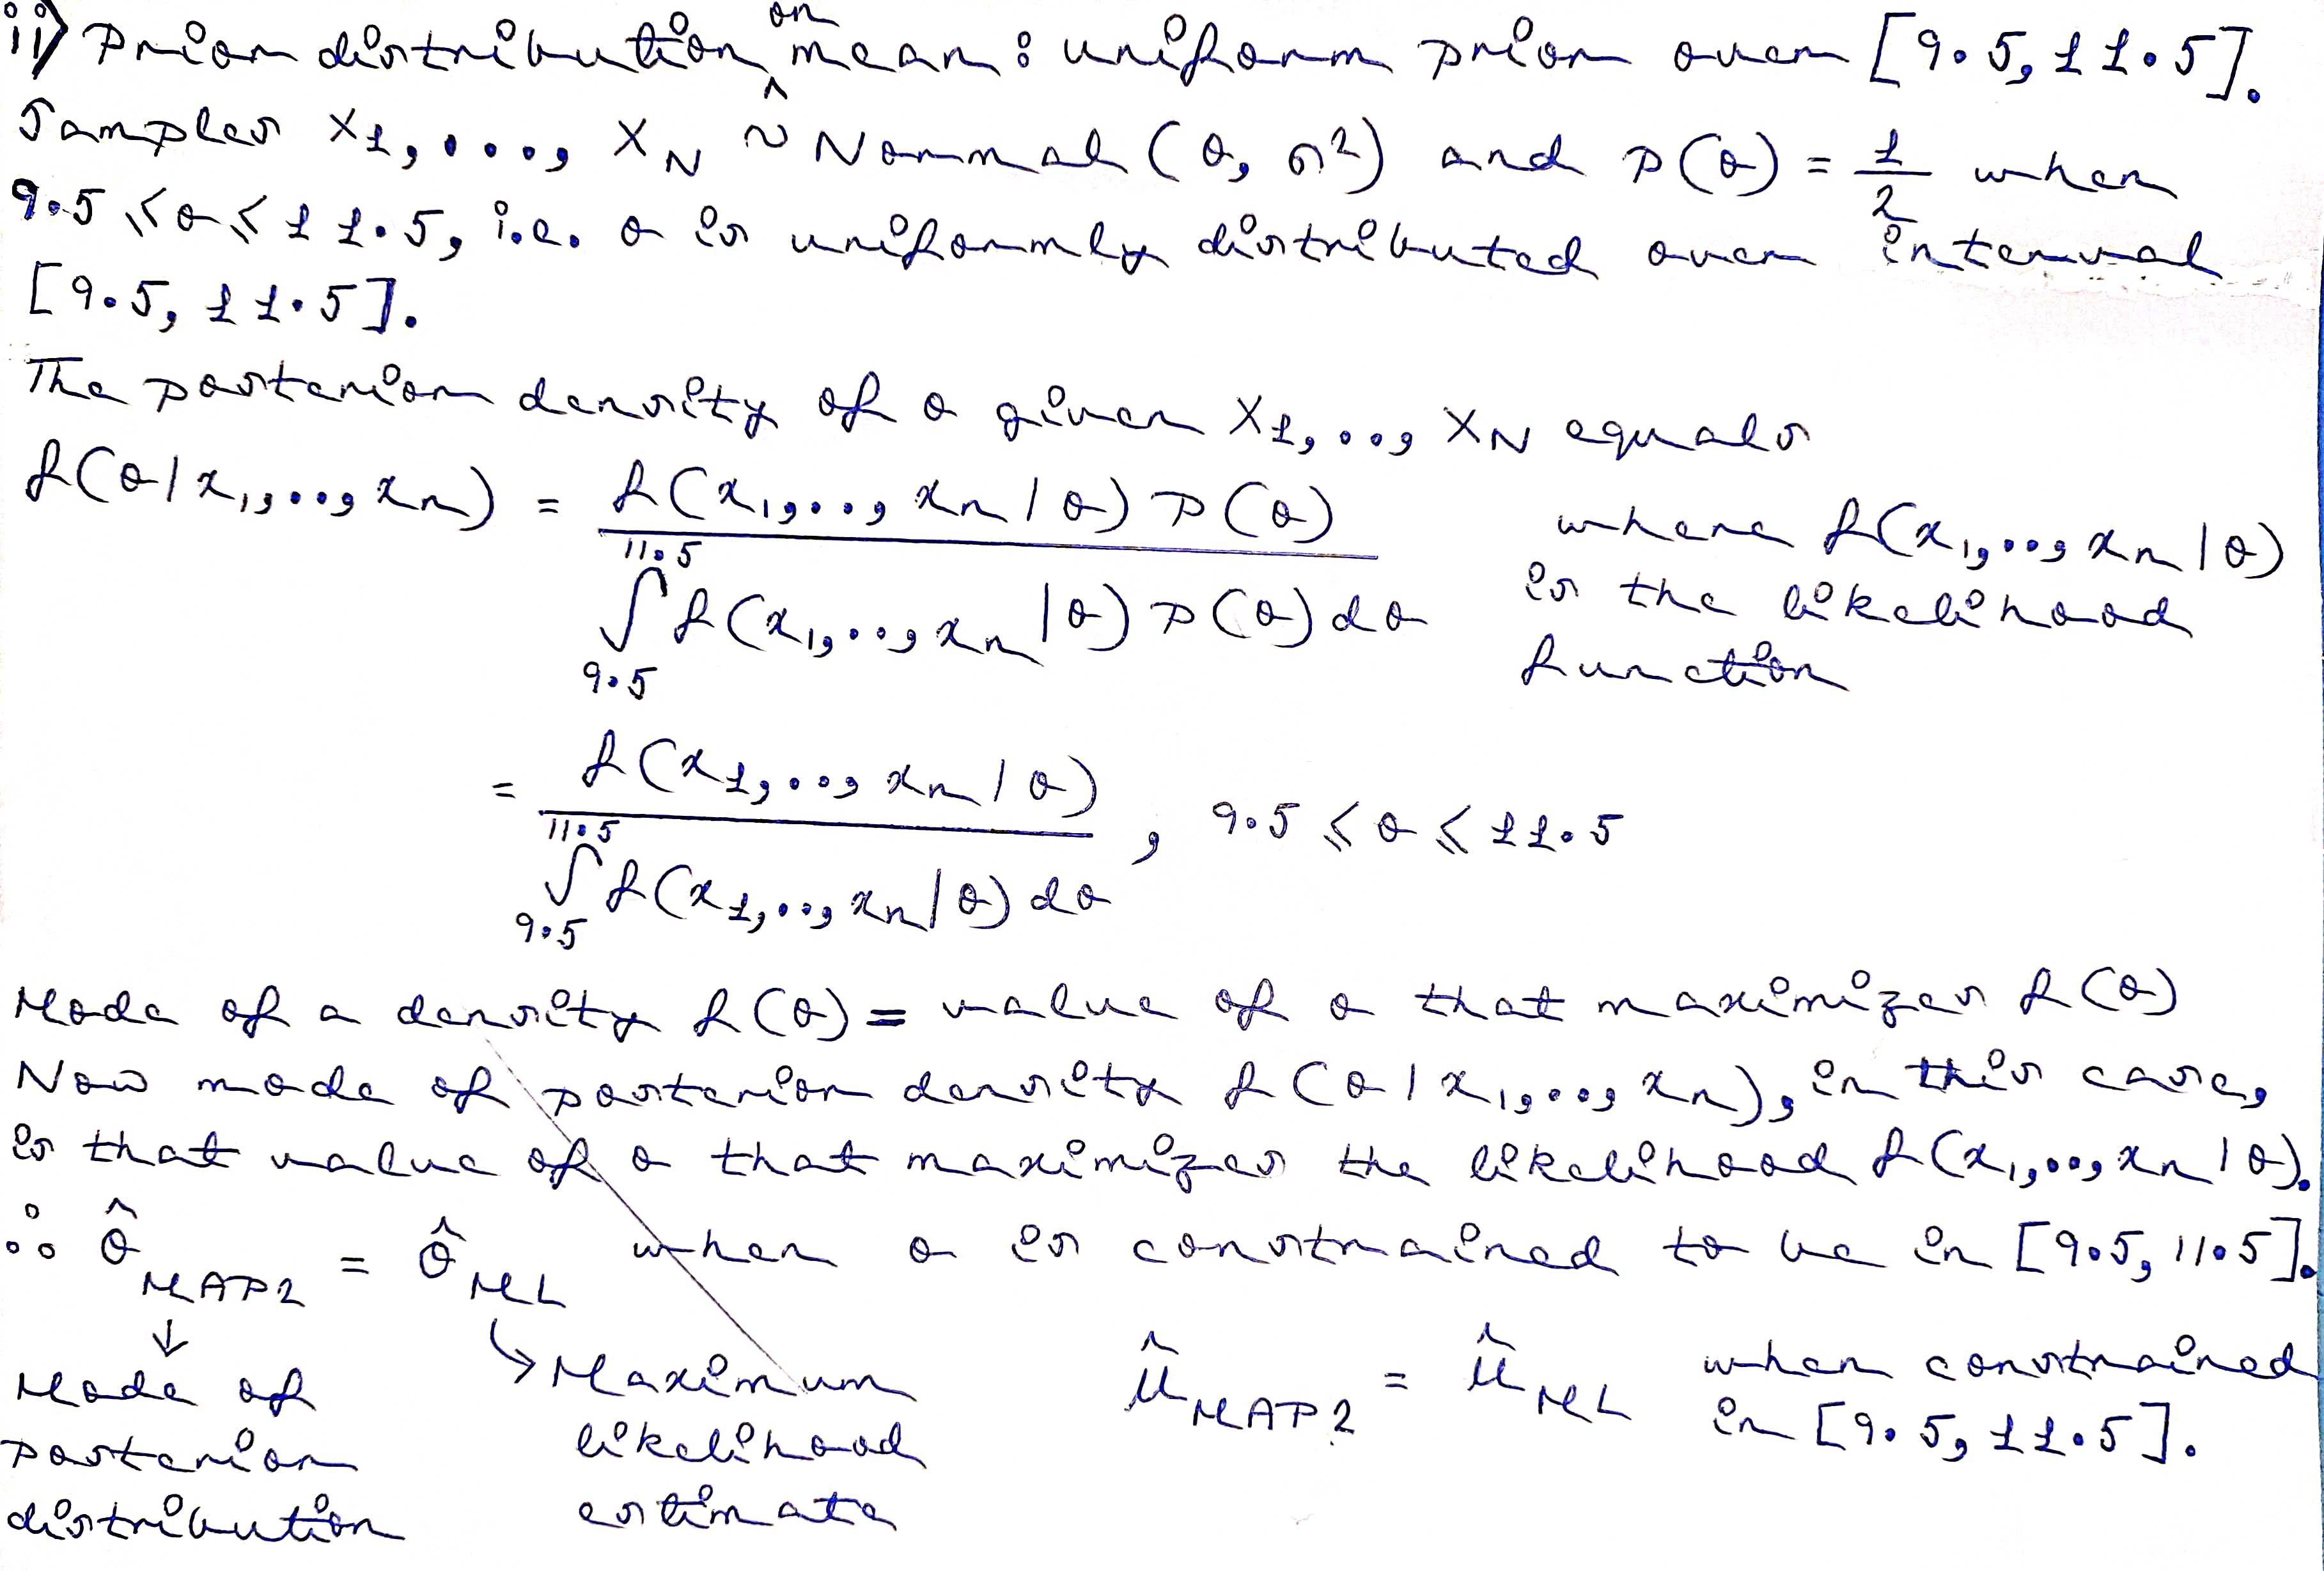

In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
µ_true = 10 #mean of the Gaussian distribution 
σ_true = 4 #standard deviation of the Gaussian distribution
N = [5, 10, 20, 40, 60, 80, 100, 500, 10**3, 10**4]    

In [3]:
def generate_samples(N):
    samples = []
    for _ in range(N):
        x = np.random.randn()*σ_true + µ_true
        samples.append(x)
    return samples  

In [4]:
def compute_sample_mean(samples):
    n = len(samples)
    s = 0
    for i in range(n):
        s += samples[i]
    return s/n

In [5]:
def compute_estimates(samples):
    n = len(samples)
    x_bar = compute_sample_mean(samples)
    µ_mle = x_bar
    µ_map1 = (n*x_bar + 168)/(n+16)
    µ_map2 = µ_mle if 9.5<=µ_mle<=11.5 else 0
    return µ_mle,µ_map1,µ_map2

def error(µ_hat,µ_true=10):
    return abs(µ_hat - µ_true)/µ_true

In [6]:
def experiment(N,M=100):
    error_list_mle =[]
    error_list_map1 =[]
    error_list_map2 =[]
    #Repeating the experiment M times
    for i in range(M):
        samples = generate_samples(N) #Generating the data
        µ_mle,µ_map1,µ_map2 = compute_estimates(samples)
        error_list_mle.append(error(µ_mle))
        error_list_map1.append(error(µ_map1))
        error_list_map2.append(error(µ_map2))
    return error_list_mle,error_list_map1,error_list_map2

In [7]:
#Running experiment 100 times for different values of N
E_list_mle = []
E_list_map1 = []
E_list_map2 = []
for n in N:
    error_list_mle,error_list_map1,error_list_map2 = experiment(n,M=100)
    E_list_mle.append(error_list_mle)
    E_list_map1.append(error_list_map1)
    E_list_map2.append(error_list_map2)

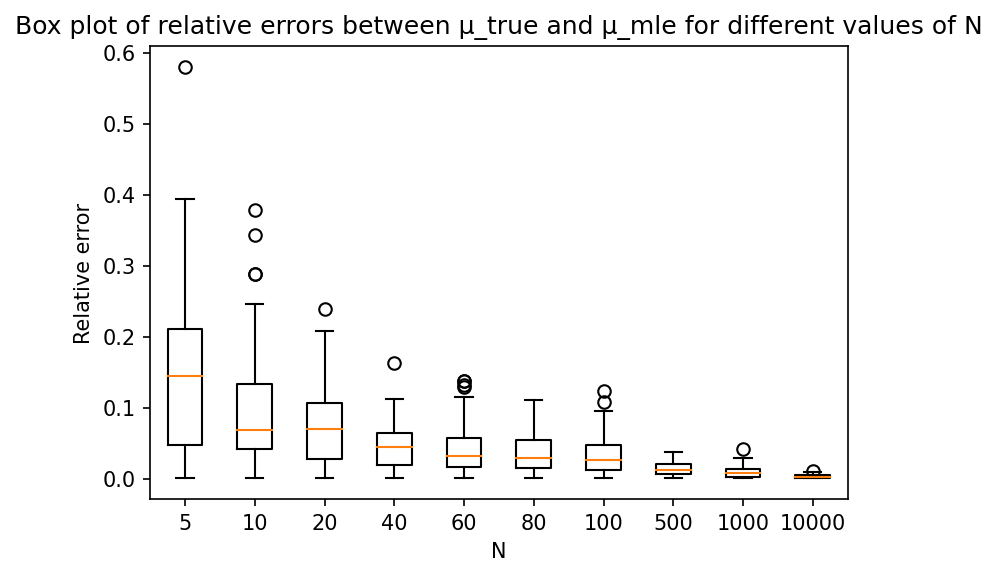

In [8]:
#MLE
plt.figure(dpi=150)
plt.boxplot(E_list_mle,labels=['5','10','20','40','60','80','100','500','1000','10000'])
plt.xlabel('N')
plt.ylabel('Relative error')
plt.title('Box plot of relative errors between µ_true and µ_mle for different values of N')
plt.show()

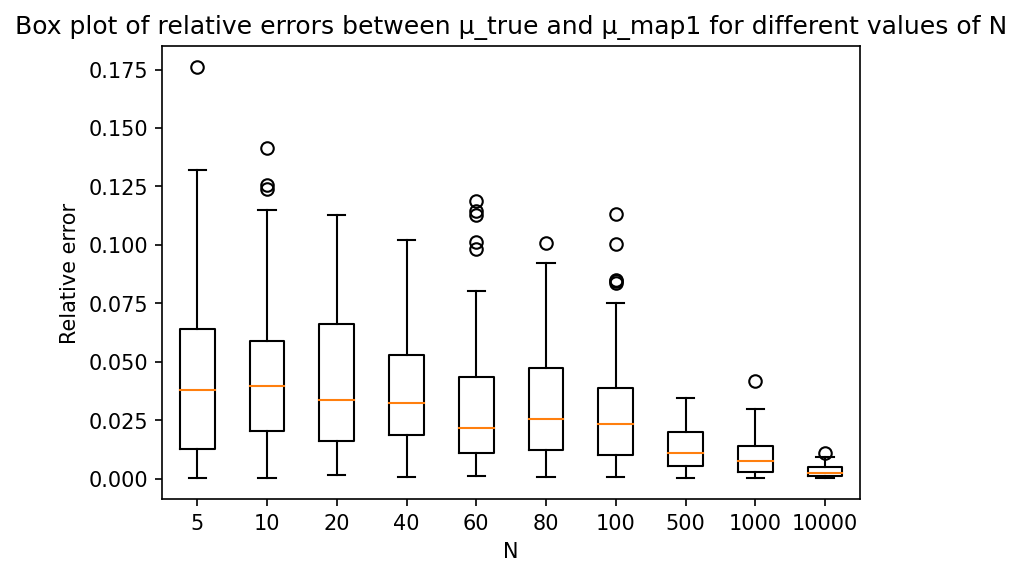

In [9]:
#MAP1
plt.figure(dpi=150)
plt.boxplot(E_list_map1,labels=['5','10','20','40','60','80','100','500','1000','10000'])
plt.xlabel('N')
plt.ylabel('Relative error')
plt.title('Box plot of relative errors between µ_true and µ_map1 for different values of N')
plt.show()

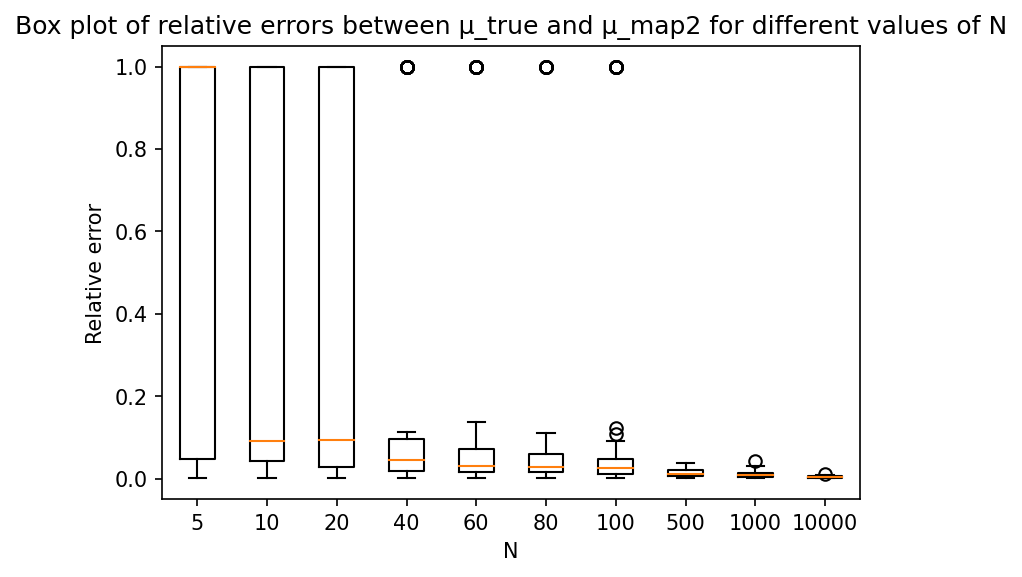

In [10]:
#MAP2
plt.figure(dpi=150)
plt.boxplot(E_list_map2,labels=['5','10','20','40','60','80','100','500','1000','10000'])
plt.xlabel('N')
plt.ylabel('Relative error')
plt.title('Box plot of relative errors between µ_true and µ_map2 for different values of N')
plt.show()

 <b>(i) What happens to the error as N increases ?</b>
 
As N increases,all the three estimates approach the true mean of the distribution.Thus the relative error or the deviation of the estimates from the true mean decreases as can be observed in the box plots.

**(ii) Which of the three estimates will you prefer and why ?**

I prefer µ_map1 which is the maximum-a-posteriori estimate of the mean with a Gaussian prior since it is a conjugate prior for Gaussian likelihood.Thus the posterior density has the same distribution as the prior density and helps us easily understand the effect of incorporating data. I do not prefer µ_map1 which is the maximum-a-posteriori estimate of the mean with a uniform prior since it is an uninformative prior and considers all values between 9.5 and 11.5 to be equally likely.MLE doesn't allow us to incorporate prior knowledge about the unknown data and produces a estimate only based on observed data. We may not get a valid estimate if observed data is not representative of the underlying distribution. Hence I also do not prefer µ_mle.